In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

### Load the data into the csv file called 'heart'

In [87]:
dataset = pd.read_csv('heart.csv')
y = dataset.values[:,13]
y = np.array([y]).T
dataset.drop('target', inplace=True, axis=1)
dataset.insert(0, "bias", 1)
X = dataset.values
max1 = max(X[:,1])
max2 = max(X[:,4])
max3 = max(X[:,5])
max4 = max(X[:,8])
X[:,1] = X[:,1] / max1
X[:,4] = X[:,4] / max2
X[:,5] = X[:,5] / max3
X[:,8] = X[:,8] / max4
print(dataset)

     bias  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0       1   63    1   3       145   233    1        0      150      0   
1       1   37    1   2       130   250    0        1      187      0   
2       1   41    0   1       130   204    0        0      172      0   
3       1   56    1   1       120   236    0        1      178      0   
4       1   57    0   0       120   354    0        1      163      1   
..    ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
294     1   63    0   0       124   197    0        1      136      1   
295     1   59    1   0       164   176    1        0       90      0   
296     1   57    0   0       140   241    0        1      123      1   
297     1   45    1   3       110   264    0        1      132      0   
298     1   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  
0        2.3      0   0     1  
1        3.5      0   0     2  
2        1.4      2   0    

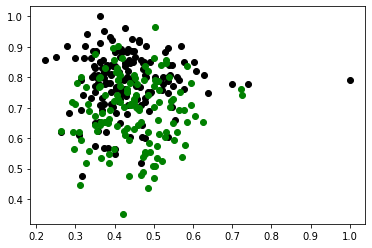

In [88]:
for i in range(len(y)):
    if y[i] == 1:
        c = 'k'
    else:
        c = 'g'
    plt.scatter(X[i,5], X[i,8], color=c)
plt.show()

### Random initialization of parameters Theta 'coefficients'

In [89]:
theta_init = np.array([[1],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],])

### Make the function of our hypotesis, this is an example of Logistic Regression, then, our hypotesis will be based on the Sigmoid function

In [90]:
def hypotesis(X, theta):
    z = np.dot(X, theta)
    return 1/(1 + np.exp(-z))

### Build the cost funcion, this functions will be pretty similar with the Cost Function in Linear Regression to calculate the squared error

In [91]:
def costFunction(X, y, theta):
    m = len(y)
    predictions = hypotesis(X, theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    return cost

### Now i build the training function, this function will iterate determinated times and, with each iteration, will use the Gradient Descent Algorithm to find the local minima or, in the best case, the global minimun point and, it save the new calculated Cost with the new coefficients or "Theta" to have an history of them and monitor the behavior of the function

In [92]:
def training(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    m = len(y)
    hypotesisResult = hypotesis(X, theta)
    for it_fit in range(iterations):
        theta = theta - (1/m) * alpha * (X.T.dot((hypotesisResult - y)))
        J_history[it_fit] = costFunction(X, y, theta)
    return J_history, theta

### Fit the model with 34 iterations and a learning rate (alpha) or 0.1

In [93]:
J_history, fitTheta = training(X, y, theta_init, 0.1, 34)

### A graph representation of what is happening with the Cost Function or Squared Error in each iteration as you can see, the Cost function is decreasing in each iteration until reach a point below, our Training model are working successfully

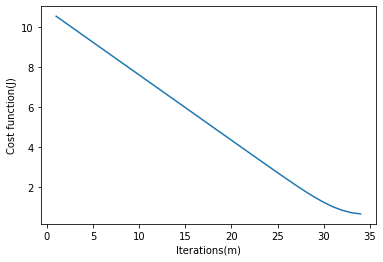

Last value of J: 0.6746697324702233
Best value of J: 0.6746697324702233
Position: 33


In [94]:
iterationsPlt = 34
pl.plot(np.arange(iterationsPlt)+1, J_history)
pylab.xlabel("Iterations(m)")
pylab.ylabel("Cost function(J)")
pl.show()
print("Last value of J: " + str(J_history[iterationsPlt - 1]))
print("Best value of J: " + str(min(J_history)))
print("Position: " + str(np.argmin(J_history, axis=0)))

### Now, the final veredict, we have here four test examples, the correct answer of those are [1, 0, 1, 0], and now, will use the parameters Theta or "Coefficients" to make the predictions

In [96]:
t1 = round(hypotesis(np.array([1,38/max1,1,2,138/max2,175/max3,0,1,173/max4,0,0,2,4,2]), fitTheta)[0])
t2 = round(hypotesis(np.array([1,68/max1,1,0,144/max2,193/max3,1,1,141/max4,0,3.4,1,2,3]), fitTheta)[0])
t3 = round(hypotesis(np.array([1,38/max1,1,2,138/max2,175/max3,0,1,173/max4,0,0,2,4,2]), fitTheta)[0])
t4 = round(hypotesis(np.array([1,57/max1,1,0,130/max2,131/max3,0,1,115/max4,1,1.2,1,1,3]), fitTheta)[0])
print([t1, t2, t3, t4])

[1, 0, 1, 0]


### And now, as you can see, the answer is correct and our algorithm (model) can predict other test examples with a good precision